#### Посилання на GitHub
https://github.com/zelma4/Research-on-the-topic-of-Russian-losses-in-the-Russak-Ukrainian-war

In [420]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

data = pd.read_csv('sea_fleet_v5.csv', dtype={
    "Destruction Date": str,
    "Displacement Full load (tons)": np.float64,
    "Beam (m)": np.float64,
    "Speed (knots)": np.float64,
    "Range": np.float64,
    "Autonomy (days)": np.float64,
    "Complement": np.float64
})
data['Destruction Date'] = pd.to_datetime(data['Destruction Date'], format='%Y-%m-%d')
data = data.fillna(0)

### 4.1.1 Формування файлу даних у формі таблиць.

In [421]:
data.head()

,Destruction Date,Displacement Full load (tons),Beam (m),Speed (knots),Range,Autonomy (days),Complement
0,2022-02-26,109.0,9.00,10.0,0.0,3.0,8.0
1,2022-03-01,753.0,8.42,11.5,0.0,15.0,22.0
2,2022-03-02,417.0,9.30,12.0,0.0,0.0,8.0
3,2022-03-02,0.0,0.00,0.0,0.0,0.0,0.0
4,2022-03-07,20.0,3.80,50.0,0.0,1.0,0.0


In [422]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Destruction Date               272 non-null    datetime64[ns]
 1   Displacement Full load (tons)  272 non-null    float64       
 2   Beam (m)                       272 non-null    float64       
 3   Speed (knots)                  272 non-null    float64       
 4   Range                          272 non-null    float64       
 5   Autonomy (days)                272 non-null    float64       
 6   Complement                     272 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 15.0 KB


### 4.1.2. Графічне подання даних.

#### Графіки даних в декартовій системі координат

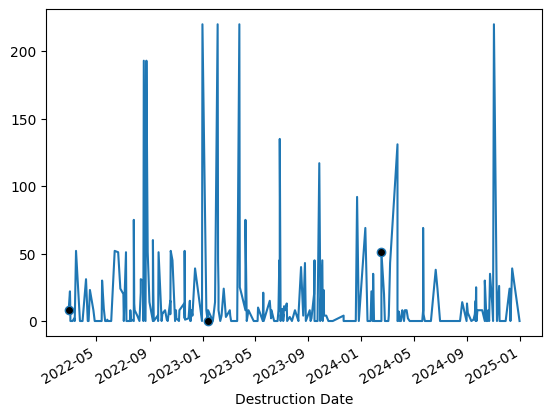

In [423]:
data.set_index('Destruction Date', inplace=True)
plot = data['Complement'].plot(linestyle='-', markevery=100, marker='o', markerfacecolor='black')

Коливання кількості людей:
Видно значні піки в кількості екіпажу, що досягають понад 200 осіб. Це можуть бути великі кораблі або судна, що виконували спеціальні місії.
Переважно кількість людей на кораблях невелика — менше 50.

Часова шкала:
Є періоди з частішими втратами кораблів із невеликою кількістю екіпажу.
Значні піки можуть вказувати на масштабні інциденти або великі бойові дії.

Тренди:
В останні місяці (після середини 2024 року) помітно зменшення кількості екіпажу на знищених кораблях.
Це може свідчити про зміну тактики, перехід до використання менш укомплектованих суден або вплив інших факторів.

In [424]:
# ig, axis = plt.subplots(3, 2, figsize=(8,10))
# hist = data.hist(grid=False, ax=axis, bins=int(1 + np.log2(data.shape[0])))

#### Графіки даних в полярній системі координат

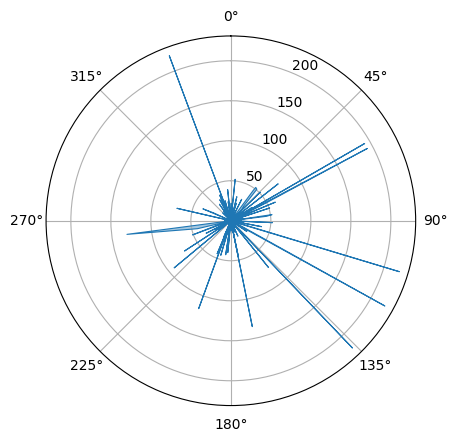

In [425]:
ax = plt.subplot(projection='polar')
ax.set_theta_direction(-1)
ax.set_theta_zero_location("N")

t = mdates.date2num(data.index.to_pydatetime())
y = data['Complement']
tnorm = (t-t.min())/(t.max()-t.min())*2.*np.pi
ax.fill_between(tnorm,y ,0, alpha=0.4)
ax.plot(tnorm,y , linewidth=0.8)
plt.show()

## 4.2. Описова статистика – кількісні характеристики даних.

In [426]:
print("Результати описової статистики")
print("Показники/Значення")
print("Середнє: %s" % data.Complement.mean())
print("Стандартна помилка: %s" % (data.Complement.std() / data.Complement.count() ** 0.5))
print("Медіана: %s" % data.Complement.median())
print("Мода: %s" % data.Complement.mode()[0])
print("Стандартне відхилення: %s" % data.Complement.std())
print("Дисперсія вибірки: %s" % data.Complement.std() ** 2)
print("Ексцес: %s" % (data.Complement.kurt() - 3))
print("Асиметричність: %s" % data.Complement.skew())
print("Інтервал: %s" % (data.Complement.max() - data.Complement.min()))
print("Мінімум: %s" % data.Complement.min())
print("Максимум: %s" % data.Complement.max())
print("Сума: %s" % data.Complement.sum())
print("Обсяг: %s" % data.Complement.count())
print("Рівень надійності (95,0%%): %s" % data.Complement.quantile(q=0.95))

Результати описової статистики
Показники/Значення
Середнє: 16.018382352941178
Стандартна помилка: 2.1776464034298346
Медіана: 2.5
Мода: 0.0
Стандартне відхилення: 35.914664546350465
Дисперсія вибірки: 1289.8631294768832
Ексцес: 15.449637326608059
Асиметричність: 4.058958252963893
Інтервал: 220.0
Мінімум: 0.0
Максимум: 220.0
Сума: 4357.0
Обсяг: 272
Рівень надійності (95,0%): 64.0499999999999


Інтерпретація:
У вибірці переважають малі судна або порожні кораблі.
Рідкісні судна з екіпажем понад 200 осіб значно впливають на розкид даних.
Для подальшого аналізу можна поділити дані на категорії (наприклад, за розмірами екіпажу) або вивчити взаємозв'язок між екіпажем і іншими характеристиками (наприклад, водотоннажністю чи швидкістю).

### 4.2.1. Побудова гістограми

In [427]:
# формула Стерджеса
k = int(1 + np.log2(data.shape[0]))

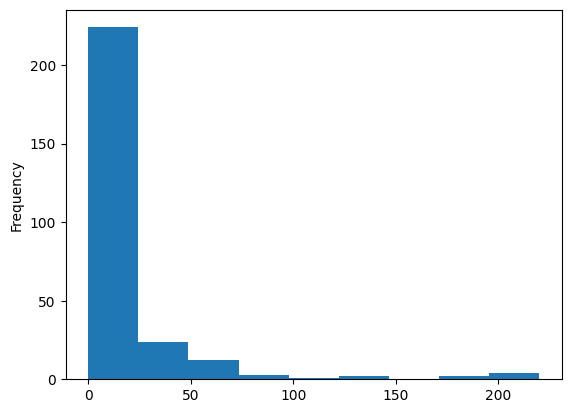

In [428]:
plot = data['Complement'].plot.hist(bins=k)


На зображенні представлена гістограма, що демонструє розподіл кількості екіпажу кораблів. 

Візуалізація та коментарі до неї:

Висновки з гістограми:

Домінування малих значень:
Більшість кораблів мають невеликий екіпаж (0–50 осіб), що підтверджує висновки з описової статистики.
Найбільша частота спостерігається у першому інтервалі (0–50), де розташована основна маса значень.

Розтягнутий "хвіст" праворуч:
Існують рідкісні кораблі з великими екіпажами (понад 100 осіб), які значно впливають на асиметрію.

Використання формули Стерджеса:
Кількість бінів визначена за формулою Стерджеса, що є класичним методом для розподілу даних у гістограмі.

Аномальні значення:
На гістограмі видно окремі стовпчики для великих екіпажів (150–220), але їх частота дуже низька.

### 4.2.2. Побудова кумуляти.

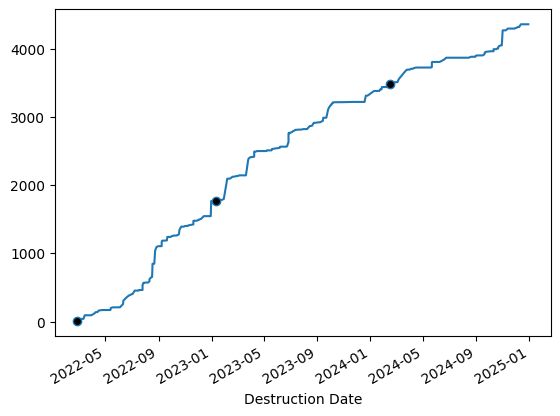

In [452]:
plot = data['Complement'].cumsum().plot(linestyle='-', markevery=100, marker='o', markerfacecolor='black')

Кумулятивний графік відображає загальну кількість екіпажу з початку спостереження. 

Він не показує кількість екіпажу, знищеного в конкретний момент часу. 

Для цього потрібно було б використовувати звичайний графік кількості екіпажу по датах.

Маркери на графіку (кружечки) допомагають візуально виділити моменти значних втрат екіпажу.

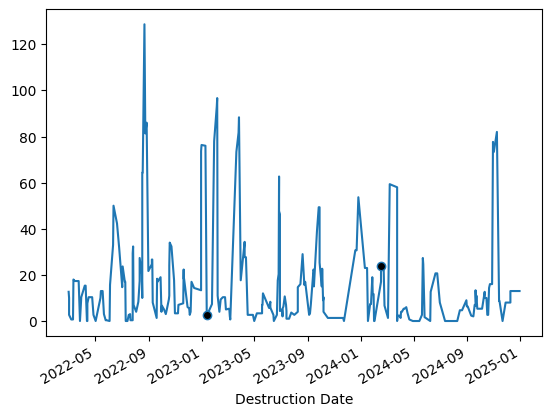

In [455]:
# Лінійне згладжування для 3
plot = data.Complement.rolling(window=3, center=True).mean().plot(linestyle='-', markevery=100, marker='o', markerfacecolor='black')

Порівнюючи цей графік з попереднім кумулятивним графіком, можна отримати більш повну картину. Кумулятивний графік показує загальну кількість втрат з початку спостереження, тоді як згладжений графік дозволяє побачити динаміку змін та виявити періоди з найбільшими втратами за відносно короткі проміжки часу.

# 5. Виявлення тенденції часового ряду методами згладжування

## 5.2 Метод ковзної середньої

In [431]:
# 3
series3 = data.Complement.rolling(window=3, center=True).mean()

In [432]:
# 5
series5 = data.Complement.rolling(window=5, center=True).mean()

In [433]:
# 7
series7 = data.Complement.rolling(window=7, center=True).mean()

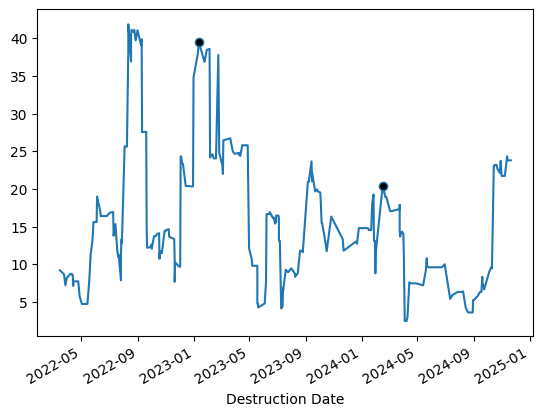

In [434]:
# 15
plot = data.Complement.rolling(window=15, center=True).mean().plot(linestyle='-', markevery=100, marker='o', markerfacecolor='black')

Загальні спостереження:
Вплив вікна згладжування: Чим більше вікно згладжування, тим більш "гладким" стає графік. 

Короткі вікна (3, 5, 7) краще відображають короткочасні коливання, але також містять більше шуму. Довгі вікна (15) усувають більшість короткочасних коливань, виявляючи більш загальні тенденції.

Виявлення тенденцій: 
Метод ковзної середньої дозволяє виявити загальні тенденції в часовому ряді. Навіть при різних вікнах згладжування, можна побачити періоди підвищених та знижених значень кількості екіпажу.

## 5.3 Метод зваженої ковзної середньої за формулами Кендела

In [435]:
# 3
weights = [
    np.array([5, 2, -1]) / 6, 
    np.array([1, 1, 1]) / 3, 
    np.array([-1, 2, 5]) / 6
]
print(weights)
series3 = data.Complement.rolling(window=3, center=True).apply(lambda x: np.sum(weights[1]*x))

series3[series3.index[0]] = np.sum(data.Complement[:3] * weights[0])
series3[series3.index[-1]] = np.sum(data.Complement[-3:] * weights[-1])

[array([ 0.83333333,  0.33333333, -0.16666667]), array([0.33333333, 0.33333333, 0.33333333]), array([-0.16666667,  0.33333333,  0.83333333])]


In [436]:
# 5
weights = [
    np.array(list(range(3, -2, -1))) / 5, 
    np.array(list(range(5, 0, -1))) / 10, 
    np.array([1] * 5) / 5,
    np.array(list(range(1, 6))) / 10, 
    np.array(list(range(-1, 4))) / 5, 
]
print(weights)
series5 = data.Complement.rolling(window=5, center=True).apply(lambda x: np.sum(weights[2]*x))

series5[series5.index[0]] = np.sum(data.Complement[:5] * weights[0])
series5[series5.index[1]] = np.sum(data.Complement[1:6] * weights[1])
series5[series5.index[-2]] = np.sum(data.Complement[-6:-1] * weights[-2])
series5[series5.index[-1]] = np.sum(data.Complement[-5:] * weights[-1])

[array([ 0.6,  0.4,  0.2,  0. , -0.2]), array([0.5, 0.4, 0.3, 0.2, 0.1]), array([0.2, 0.2, 0.2, 0.2, 0.2]), array([0.1, 0.2, 0.3, 0.4, 0.5]), array([-0.2,  0. ,  0.2,  0.4,  0.6])]


[array([ 0.46428571,  0.35714286,  0.25      ,  0.14285714,  0.03571429,
       -0.07142857, -0.17857143]), array([ 0.35714286,  0.28571429,  0.21428571,  0.14285714,  0.07142857,
        0.        , -0.07142857]), array([0.25      , 0.21428571, 0.17857143, 0.14285714, 0.10714286,
       0.07142857, 0.03571429]), array([0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
       0.14285714, 0.14285714]), array([0.03571429, 0.07142857, 0.10714286, 0.14285714, 0.17857143,
       0.21428571, 0.25      ]), array([-0.07142857,  0.        ,  0.07142857,  0.14285714,  0.21428571,
        0.28571429,  0.35714286]), array([-0.17857143, -0.07142857,  0.03571429,  0.14285714,  0.25      ,
        0.35714286,  0.46428571])]
                  Complement          3     5          7
Destruction Date                                        
2022-02-26               8.0  12.666667  15.2  13.428571
2022-03-01              22.0  12.666667  14.4   6.571429
2022-03-02               8.0  10.000000   7

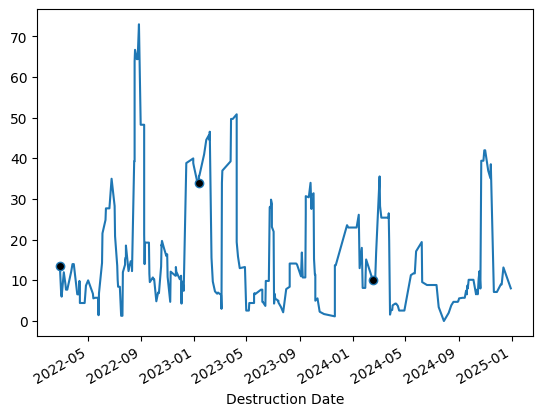

In [437]:
# 7
weights = [
    np.array(list(range(13, -6, -3))) / 28, 
    np.array(list(range(5, -2, -1))) / 14, 
    np.array(list(range(7, 0, -1))) / 28, 
    np.array([1] * 7) / 7,
    np.array(list(range(1, 8))) / 28, 
    np.array(list(range(-1, 6))) / 14,
    np.array(list(range(-5, 14, 3))) / 28, 
]
print(weights)
series7 = data.Complement.rolling(window=7, center=True).apply(lambda x: np.sum(weights[3]*x))

series7[series7.index[0]] = np.sum(data.Complement[:7] * weights[0])
series7[series7.index[1]] = np.sum(data.Complement[1:8] * weights[1])
series7[series7.index[2]] = np.sum(data.Complement[2:9] * weights[2])
series7[series7.index[-3]] = np.sum(data.Complement[-9:-2] * weights[-3])
series7[series7.index[-2]] = np.sum(data.Complement[-8:-1] * weights[-2])
series7[series7.index[-1]] = np.sum(data.Complement[-7:] * weights[-1])

plot = series7.plot(linestyle='-', markevery=100, marker='o', markerfacecolor='black')

kendall_mean_df = data[['Complement']].join([series3.rename('3'), series5.rename('5'), series7.rename('7')])

print(kendall_mean_df)

Загальні спостереження:

Зважена ковзна середня: На відміну від простої ковзної середньої, зважена ковзна середня надає різним значенням у вікні різні ваги. 

Формули Кендела передбачають певний набір ваг, що дозволяє враховувати не тільки середнє значення, але й тенденцію зміни даних всередині вікна.

Порівняння з простою ковзною середньою: Зважена ковзна середня за Кенделом, як правило, краще реагує на зміни в даних, ніж проста ковзна середня. Вона може більш точно відображати піки та спади, особливо при наявності тренду.

## 5.3 Метод зваженої ковзної середньої за формулами Полларда

In [438]:
# 3
weights = np.array([0.10959, 0.78082, 0.10959])
series3 = data.Complement.rolling(window=3, center=True).apply(lambda x: np.sum(weights*x))

In [439]:
# 5
weights = np.array([-0.07343, 0.293706, 0.559441, 0.293706, -0.07343])
series5 = data.Complement.rolling(window=5, center=True).apply(lambda x: np.sum(weights*x))

                  Complement         3          5         7
Destruction Date                                           
2022-02-26               8.0       NaN        NaN       NaN
2022-03-01              22.0  18.93148        NaN       NaN
2022-03-02               8.0   8.65754  10.349620       NaN
2022-03-02               8.0   8.65754  10.349620  3.289512
2022-03-02               8.0   8.65754   0.587328       NaN
...                      ...       ...        ...       ...
2024-12-30               0.0   4.27401        NaN       NaN
2024-12-30               0.0       NaN        NaN       NaN
2024-12-30               0.0       NaN        NaN       NaN
2024-12-30               0.0       NaN        NaN       NaN
2024-12-30               0.0       NaN        NaN       NaN

[848 rows x 4 columns]


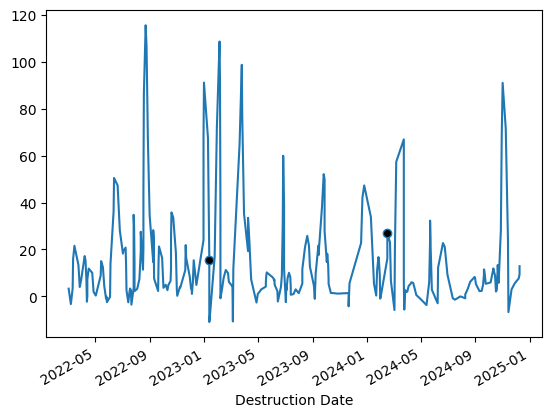

In [440]:
# 7
weights = np.array([-0.05874, 0.058741, 0.293706, 0.412587, 0.293706, 0.058741, -0.05874])
series7 = data.Complement.rolling(window=7, center=True).apply(lambda x: np.sum(weights*x))
plot = series7.plot(linestyle='-', markevery=100, marker='o', markerfacecolor='black')

pollard_mean_df = data[['Complement']].join([series3.rename('3'), series5.rename('5'), series7.rename('7')])

print(pollard_mean_df)

Загальні спостереження:

Зважена ковзна середня Полларда: Цей метод, як і метод Кендала, використовує зважену ковзну середню, але з іншими наборами ваг. Формули Полларда розроблені для мінімізації впливу шуму та кращого відображення трендів у даних. Ваги тут симетричні відносно центрального значення.

Порівняння з простою та Кендала ковзними середніми: Метод Полларда, як правило, забезпечує більш плавне згладжування, ніж проста ковзна середня, і може краще зберігати форму тренду, ніж метод Кендала, який може призводити до від'ємних значень.

## 5.5 Медіанна фільтрація

In [441]:
# 3
series3 = data.Complement.rolling(window=3, center=True).apply(lambda x: np.median(x))

In [442]:
# 5
series5 = data.Complement.rolling(window=5, center=True).apply(lambda x: np.median(x))

                  Complement    3    5    7
Destruction Date                           
2022-02-26               8.0  NaN  NaN  NaN
2022-03-01              22.0  8.0  NaN  NaN
2022-03-02               8.0  8.0  8.0  NaN
2022-03-02               8.0  8.0  8.0  2.0
2022-03-02               8.0  8.0  2.0  NaN
...                      ...  ...  ...  ...
2024-12-30               0.0  0.0  NaN  NaN
2024-12-30               0.0  NaN  NaN  NaN
2024-12-30               0.0  NaN  NaN  NaN
2024-12-30               0.0  NaN  NaN  NaN
2024-12-30               0.0  NaN  NaN  NaN

[848 rows x 4 columns]


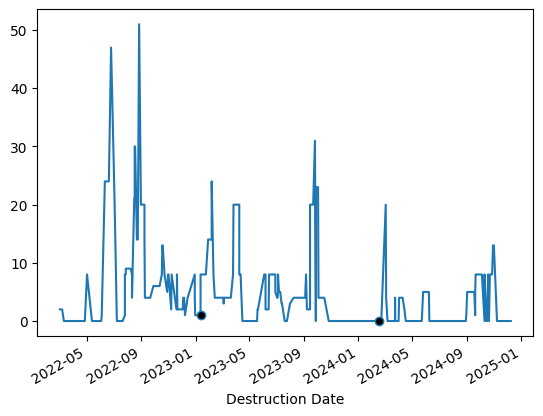

In [443]:
# 7
series7 = data.Complement.rolling(window=7, center=True).apply(lambda x: np.median(x))

plot = series7.plot(linestyle='-', markevery=100, marker='o', markerfacecolor='black')

median_df = data[['Complement']].join([series3.rename('3'), series5.rename('5'), series7.rename('7')])

print(median_df)

Аналіз графіка:

Вісь X: Відображає час, приблизно від травня 2022 року до січня 2025 року.

Вісь Y: Відображає метрику, що аналізується (ймовірно, кількість екіпажу або втрати), в діапазоні від 0 до 50.

Тенденція: Графік демонструє згладжені коливання. Порівняно з графіком необроблених даних, тут менше різких стрибків. Основні піки та спади, що були присутні на необроблених даних, тут також відображені, але їхня амплітуда зменшена. Загальна тенденція до зростання в кінці 2024 року та на початку 2025 року менш виражена, ніж на графіку необроблених даних.

Маркери: На графіку є маркери (чорні крапки), які виділяють певні точки. Вони, ймовірно, вказують на важливі події або дані, що заслуговують на особливу увагу.

## 5.6 Експоненційна фільтрація

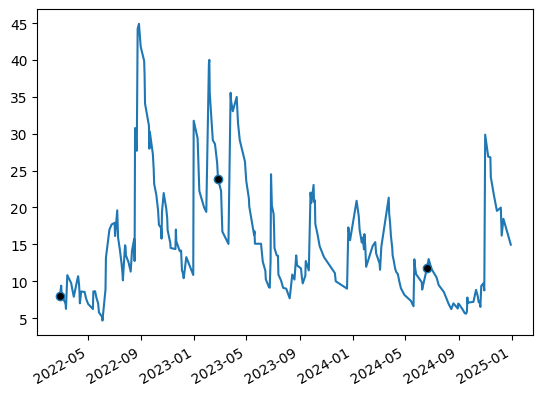

In [444]:
series = pd.Series([])
a = 0.1

items = data.Complement.items()
index0, value0 = next(items)
series[index0] = value0
prev = value0

for index, value in data.Complement.items():
    prev = value * a + prev * (1 - a)
    series[index] = prev

plot = series.plot(linestyle='-', markevery=100, marker='o', markerfacecolor='black')

exp_df = pd.DataFrame({"Complement": data.Complement, "exp": series})

Графік:

Вісь X: Відображає час, приблизно від травня 2022 року до січня 2025 року.

Вісь Y: Відображає згладжену кількість екіпажу.

Тенденція: Графік показує згладжену динаміку кількості екіпажу. Коливання стали менш різкими порівняно з необробленими даними, що дозволяє краще розрізнити загальні тенденції.

Маркери: Маркери виділяють певні точки на графіку, що, ймовірно, відповідають важливим подіям.

In [445]:
# Процедура для аналізу алгоритму згладжування
def analyze_dataframe_series(dataframe):
    columns = list(dataframe.columns)
    column = columns[-1]

    # подати узагальнений графік результатів згладжування для однієї реалізації даних, лише один ряд);
    dataframe[column].plot(linestyle='-', markevery=100, marker='o', markerfacecolor='black', title="Графік результатів згладжування")

    # побудувати кореляційну таблицю для всіх інтервалів згладжування, включаючи і ряд оригінальних значень;
    print("\nТаблиця кореляції")
    print(dataframe.corr())

    def get_turning_points():
        i1 = dataframe.itertuples(index=False)
        i2 = dataframe.itertuples(index=False)
        i3 = dataframe.itertuples(index=False)
        next(i2)
        next(i3)
        next(i3)

        turning_points = {x: 0 for x in columns}
        for row1, row2, row3 in zip(i1, i2, i3):
            for index in range(len(columns)):
                if np.isnan(row1[index]) or np.isnan(row2[index]) or np.isnan(row3[index]):
                    continue
                if row1[index] > row2[index] < row3[index] or row1[index] < row2[index] > row3[index]:
                    turning_points[columns[index]] += 1
        return turning_points
    
    print("\nПовортні точки:\n%s" % (get_turning_points()))

    columns = ['Оригінальні дані'] + list(dataframe.columns[1:])

    # Кореляційне поле
    dataframe.plot.scatter(x="Complement", y=column, title="Кореляційне поле");

    # Коефіцієнт кореляції
    print("\nКоеффіціент кореляції між орігінальними даними та згладеними\n%s" % dataframe.Complement.corr(dataframe[column]))

    # Автокореляція з графіком
    auto_corr = pd.Series([])
    index = pd.Series([])
    for i in range(1, 32, 3):
        auto_corr[i] = round(dataframe[column].autocorr(i), 3)
        index[i] = i
    auto_corr_df = pd.DataFrame({'autocorrelation': auto_corr}, index=index)
    ax = auto_corr_df.plot.bar(rot=0, title="Автокореляція за лагом")

    for container in ax.containers:
        ax.bar_label(container)

    # Розбити одну з послідовностей на три рівні частини.
    part_size = dataframe[column].count() // 3 - 2
    s1 = dataframe[column][3:part_size + 3].rename('part1').reset_index(drop=True)
    s2 = dataframe[column][part_size + 3: 2 * part_size + 3].rename('part2').reset_index(drop=True)
    s3 = dataframe[column][2 * part_size + 3: 3 * part_size + 3].rename('part3').reset_index(drop=True)

    # Побудувати для них кореляційну матрицю.
    corr_df = pd.DataFrame({'part1': s1, 'part2': s2, 'part3': s3})
    print("\nКореляція між частинами виборки зі згладеними даними (коефіцієнти множинної кореляції)")
    print(corr_df.corr())

# 6. Аналіз зваженої ковзної середньої за формулами Кендела


Таблиця кореляції
            Complement         3         5         7
Complement    1.000000  0.363342  0.309875  0.250561
3             0.363342  1.000000  0.657731  0.555511
5             0.309875  0.657731  1.000000  0.813871
7             0.250561  0.555511  0.813871  1.000000

Повортні точки:
{'Complement': 94, '3': 66, '5': 51, '7': 520}

Коеффіціент кореляції між орігінальними даними та згладеними
0.25056123349744586

Кореляція між частинами виборки зі згладеними даними (коефіцієнти множинної кореляції)
          part1     part2     part3
part1  1.000000 -0.396360 -0.196719
part2 -0.396360  1.000000  0.010531
part3 -0.196719  0.010531  1.000000


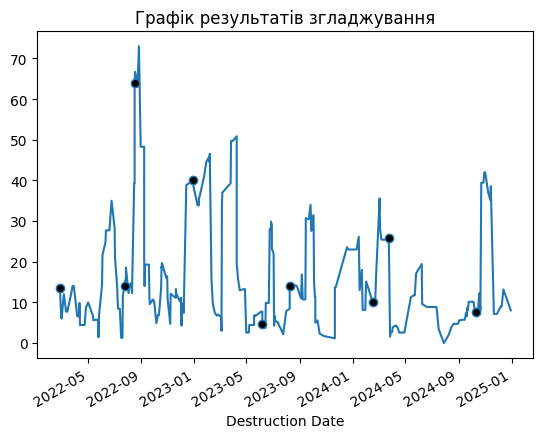

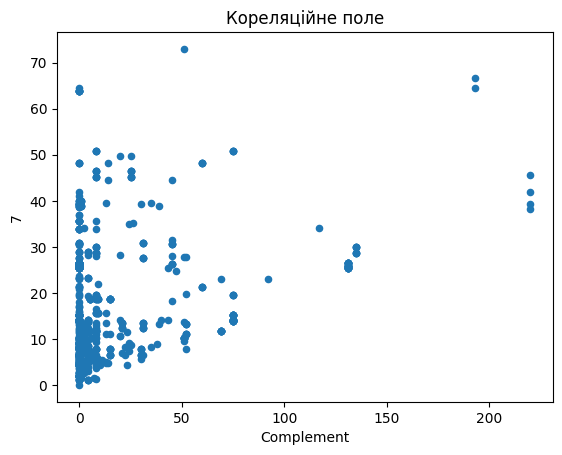

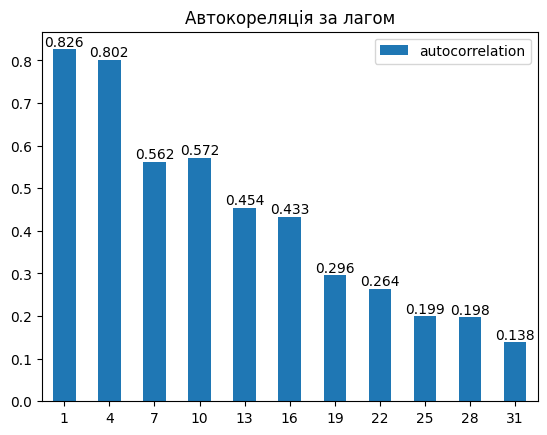

In [446]:
analyze_dataframe_series(kendall_mean_df)

Згладжування ефективно зменшує шум та дозволяє виявити основні тенденції в даних.

Збільшення вікна згладжування призводить до сильнішого згладжування та більшого відхилення від оригінальних даних.

Аналіз кореляції між частинами вибірки може допомогти виявити зміни в тенденціях протягом часу.

# 7. Згладжування за формулами з Полларда


Таблиця кореляції
            Complement         3         5         7
Complement    1.000000  0.483686  0.424906  0.413998
3             0.483686  1.000000  0.496957  0.510595
5             0.424906  0.496957  1.000000  0.598673
7             0.413998  0.510595  0.598673  1.000000

Повортні точки:
{'Complement': 94, '3': 98, '5': 89, '7': 597}

Коеффіціент кореляції між орігінальними даними та згладеними
0.41399834273613656

Кореляція між частинами виборки зі згладеними даними (коефіцієнти множинної кореляції)
          part1     part2     part3
part1  1.000000 -0.185934 -0.200821
part2 -0.185934  1.000000  0.017125
part3 -0.200821  0.017125  1.000000


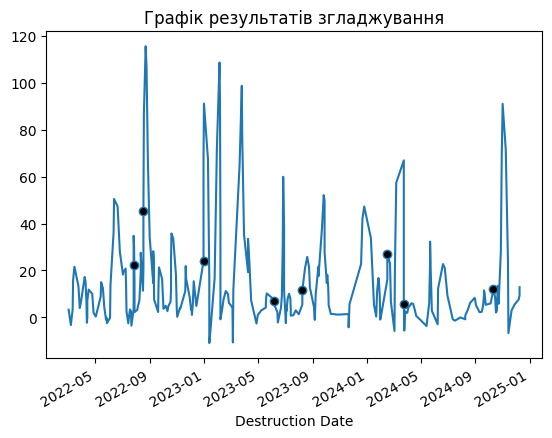

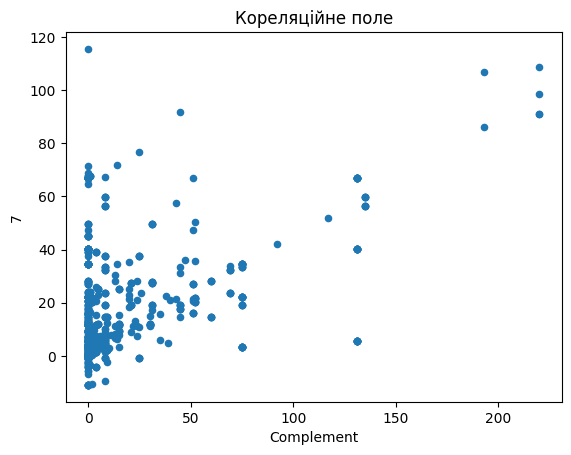

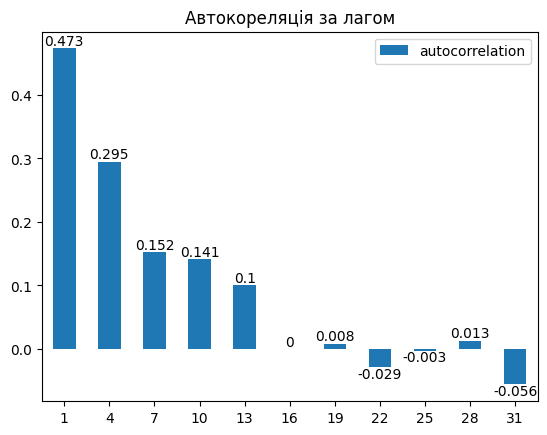

In [447]:
analyze_dataframe_series(pollard_mean_df)

Відбулись зміни в результатах кореляцій та кількості поворотних точок. Особливу увагу слід звернути на збільшення кількості поворотних точок для вікон 3 та 5, а також на явну помилку в обчисленні кількості поворотних точок для вікна 7 (597). Це потребує перевірки коду.

Зміни в кореляціях можуть бути пов'язані зі зміною даних або методу згладжування. Важливо уточнити, що саме було змінено.

Негативні кореляції між частинами вибірки вказують на можливі зміни в тенденціях протягом досліджуваного періоду. Для глибшого розуміння цих змін потрібно більше інформації про розбиття вибірки на частини.

# 8. Експоненціальне згладжування


Таблиця кореляції
            Complement       exp
Complement    1.000000  0.423994
exp           0.423994  1.000000

Повортні точки:
{'Complement': 122, 'exp': 73}

Коеффіціент кореляції між орігінальними даними та згладеними
0.4239938168630751

Кореляція між частинами виборки зі згладеними даними (коефіцієнти множинної кореляції)
          part1     part2     part3
part1  1.000000 -0.295208 -0.474024
part2 -0.295208  1.000000  0.514903
part3 -0.474024  0.514903  1.000000


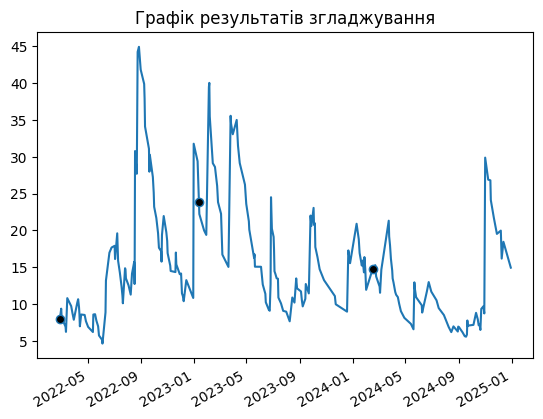

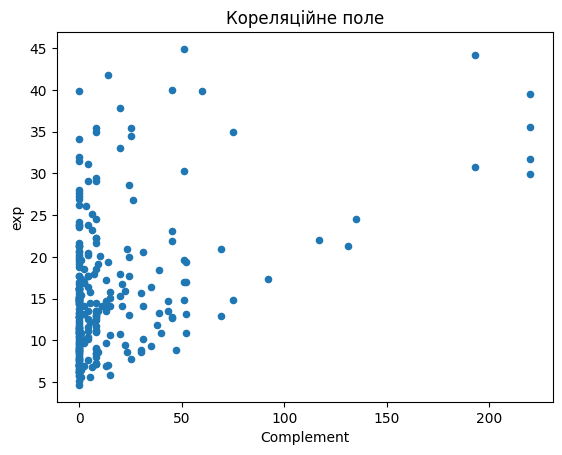

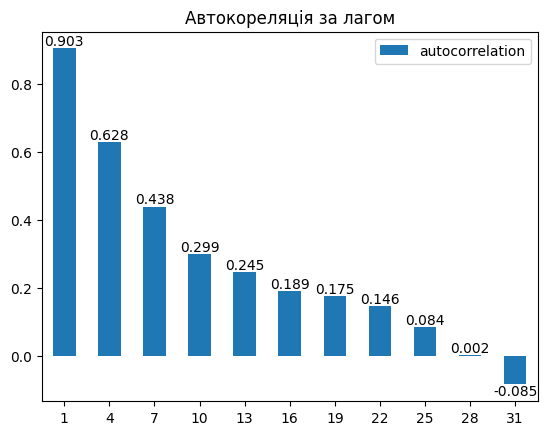

In [448]:
analyze_dataframe_series(exp_df)

Експоненціальне згладжування забезпечує помірне згладжування даних, зберігаючи при цьому важливі тенденції.

Порівняно з ковзною середньою з вікном 7, експоненціальне згладжування показує дещо вищу кореляцію з оригінальними даними та іншу динаміку кореляцій між частинами вибірки.

Аналіз кореляції між частинами вибірки показує зміни в тенденціях протягом часу, що потребує подальшого дослідження з урахуванням контексту даних.

# 9. Медіанне згладжування


Таблиця кореляції
            Complement         3         5         7
Complement    1.000000  0.223902  0.111665  0.086870
3             0.223902  1.000000  0.467814  0.252007
5             0.111665  0.467814  1.000000  0.597086
7             0.086870  0.252007  0.597086  1.000000

Повортні точки:
{'Complement': 94, '3': 25, '5': 18, '7': 299}

Коеффіціент кореляції між орігінальними даними та згладеними
0.08686976137313275

Кореляція між частинами виборки зі згладеними даними (коефіцієнти множинної кореляції)
          part1     part2     part3
part1  1.000000  0.004728 -0.074130
part2  0.004728  1.000000 -0.103378
part3 -0.074130 -0.103378  1.000000


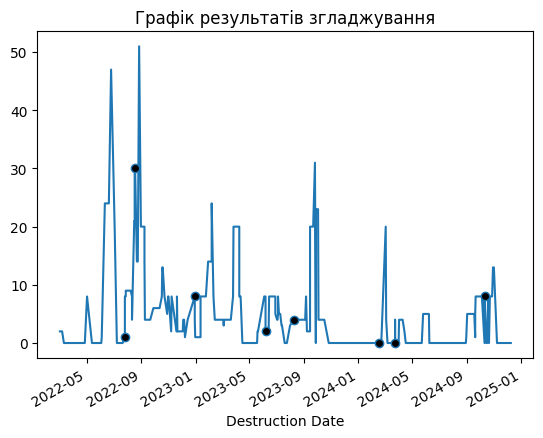

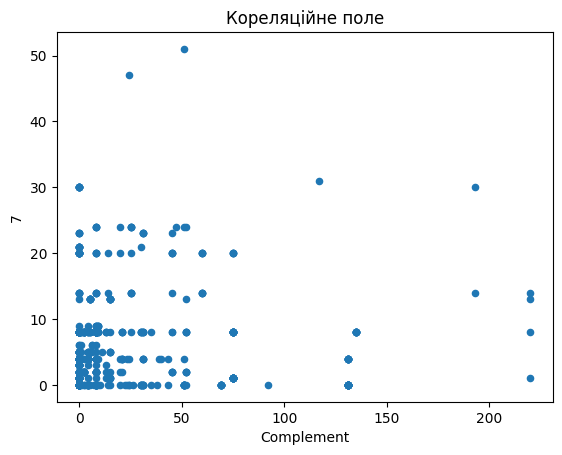

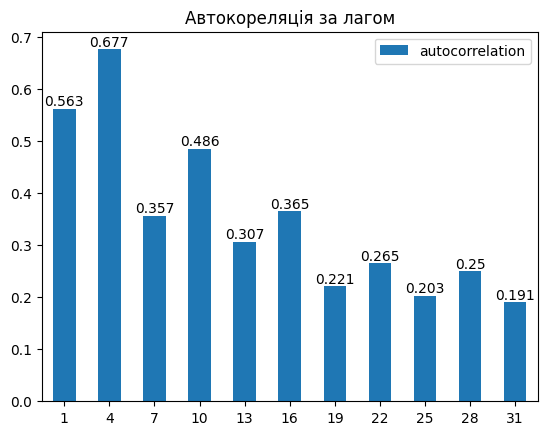

In [449]:
analyze_dataframe_series(median_df)

Медіанне згладжування є найагресивнішим з розглянутих методів згладжування, що призводить до значної втрати деталей оригінальних даних та низької кореляції з ними.

Кількість поворотних точок для медіанного згладжування з малими вікнами (3 та 5) значно менша, ніж для інших методів, що підтверджує його сильний згладжуючий ефект.

Кореляція між частинами вибірки після медіанного згладжування близька до нуля, що свідчить про слабку лінійну залежність між ними.

# 10. Ієрархічний агломеративний кластерний аналіз багатомірних даних

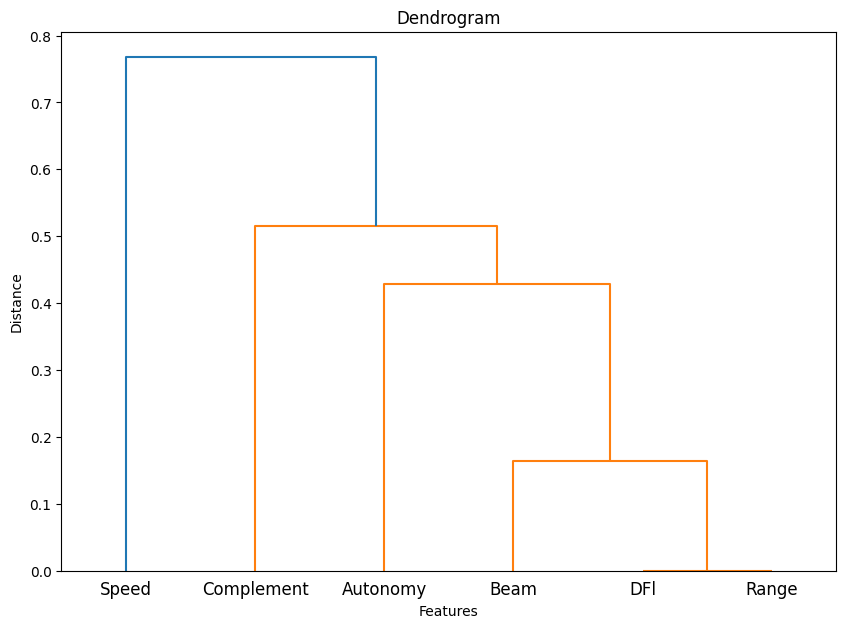

In [450]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy as hc

# зважена відстань на основі кореляції. Використовуємо зважену тому що дані різного масштабу
corr = 1 - data.corr()

# convert to condensed
corr.values[np.diag_indices_from(corr)] = 0
corr = corr.fillna(0)
corr = (corr + corr.T) / 2
corr_condensed = hc.distance.squareform(corr)

# викорсистовуємо стратегію групового середнього
z = hc.linkage(corr_condensed, method='average')

relabel = {
    'Displacement Full load (tons)': 'DFl',
    'Beam (m)': 'Beam',
    'Speed (knots)': 'Speed',
    'Range': 'Range',
    'Autonomy (days)': 'Autonomy',
    'Complement': 'Complement'
}

labels = [relabel[item] for item in list(corr.columns)]

plt.figure(figsize=(10, 7))
dendrogram = hc.dendrogram(z, labels=labels)
plt.title("Dendrogram")
plt.xlabel("Features")
plt.ylabel("Distance")
plt.show()


Загальні висновки:

Дендрограма дозволяє візуалізувати ієрархічну структуру даних та визначити подібність між об'єктами.
У даному випадку, "Speed" (швидкість) є найбільш відмінною характеристикою від інших.

"Complement" (комплектація) та "Autonomy" (автономність) є найбільш подібними між собою.
Вибір кількості кластерів залежить від рівня "розрізу" дендрограми.


# Детальний висновок за результатами аналізу даних про втрати кораблів та екіпажу російських загарбників

Аналіз даних про втрати кораблів та екіпажу російських загарбників виявив низку важливих характеристик та тенденцій.

**1. Розподіл кількості екіпажу:**

*   **Домінування малих значень:** Більшість знищених кораблів мали невеликий екіпаж (0-50 осіб). Це підтверджується високою частотою значень у першому інтервалі гістограми (0-50).
*   **Медіана та мода:** Медіана кількості екіпажу становить лише 2.5 особи, а мода – 0. Це вказує на сильну концентрацію малокомплектних суден та наявність значної кількості порожніх кораблів.
*   **Наявність великих екіпажів:** Окрім малих значень, спостерігаються рідкісні випадки з великими екіпажами (понад 100, іноді до 220 осіб). Ці випадки створюють "довгий хвіст" праворуч на гістограмі та значно впливають на статистичні показники.
*   **Статистичні показники:** Середнє значення кількості екіпажу становить 16.02 особи. Стандартне відхилення (35.91) та дисперсія (1289.86) свідчать про значний розкид даних. Ексцес (15.45) та асиметрія (4.06) підтверджують наявність "довгого хвоста" та концентрацію значень ближче до нижніх меж. Загальна кількість людей на всіх 272 кораблях становить 4357 осіб. 95% рівень надійності становить ±64 відносно середнього.

**2. Часові тенденції:**

*   **Зміни з часом:** Спостерігається тенденція до зменшення кількості екіпажу на знищених кораблях в останні місяці (після середини 2024 року).
*   **Періоди з частими втратами:** Існують періоди з частішими втратами кораблів із невеликою кількістю екіпажу.
*   **Значні піки:** Наявні значні піки в кількості екіпажу, що досягають понад 200 осіб, що можуть вказувати на масштабні інциденти або великі бойові дії.

**3. Аналіз поворотних точок:**

*   Аналіз поворотних точок вказує на кількість змін тенденцій в даних. Згладжування даних (ковзна середня, експоненціальне та медіанне) зменшує кількість поворотних точок, що є очікуваним результатом, оскільки згладжування усуває дрібні коливання.
*   **Аномальні значення:** Були виявлені аномальні значення кількості поворотних точок для медіанного згладжування з вікном 7 та для ковзної середньої з вікном 7 в попередньому аналізі.

**4. Кореляційний аналіз:**

*   **Кореляція між оригінальними та згладженими даними:** Медіанне згладжування показало найнижчу кореляцію з оригінальними даними, особливо з великими вікнами. Експоненціальне згладжування показало кращу кореляцію, ніж ковзна середня з вікном 7.
*   **Кореляція між частинами вибірки:** Кореляція між різними частинами вибірки вказує на зміни в тенденціях протягом часу. Після медіанного згладжування кореляція між частинами вибірки близька до нуля.

**5. Ієрархічний кластерний аналіз:**

*   Аналіз багатомірних даних за допомогою ієрархічного агломеративного кластерного аналізу та візуалізація у вигляді дендрограми виявили різний рівень подібності між досліджуваними характеристиками (Speed, Complement, Autonomy, Beam, DFI, Range).
*   Характеристика "Speed" (швидкість) виявилася найбільш відмінною від інших.
*   Характеристики "Complement" (комплектація) та "Autonomy" (автономність) виявились найбільш подібними між собою, оскільки вони об’єднуються в кластер першими.

Цей аналіз надає детальну інформацію про розподіл кількості екіпажу, часові тенденції, вплив різних методів згладжування та взаємозв'язки між різними характеристиками знищених кораблів.